In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")
pd.pandas.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv("HR.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.shape

(14999, 10)

### Missing values 

In [7]:
feature_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1]
feature_with_nan

[]

In [8]:
#analyzing the target variable
data['left'].unique()

array([1, 0])

In [9]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

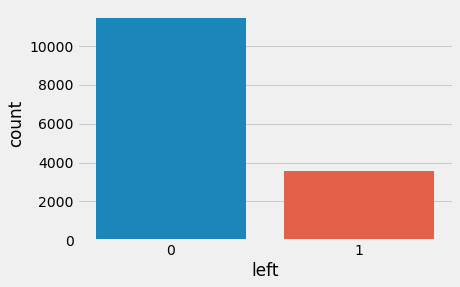

In [10]:
sns.countplot(data['left'])
plt.show()

In [11]:
for col in data.drop(['salary','sales'],axis=1).columns:
    print("The skewed value of the {} is {}".format(col,data[col].skew()))

The skewed value of the satisfaction_level is -0.4763603412839644
The skewed value of the last_evaluation is -0.02662174986376086
The skewed value of the number_project is 0.3377056123598222
The skewed value of the average_montly_hours is 0.0528419894163242
The skewed value of the time_spend_company is 1.8533190474339154
The skewed value of the Work_accident is 2.021148738456709
The skewed value of the left is 1.2300425867389264
The skewed value of the promotion_last_5years is 6.636968380523423


In [12]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [13]:
for feature in data.columns:
    print("{}: {}".format(feature,len(data[feature].unique())))

satisfaction_level: 92
last_evaluation: 65
number_project: 6
average_montly_hours: 215
time_spend_company: 8
Work_accident: 2
left: 2
promotion_last_5years: 2
sales: 10
salary: 3


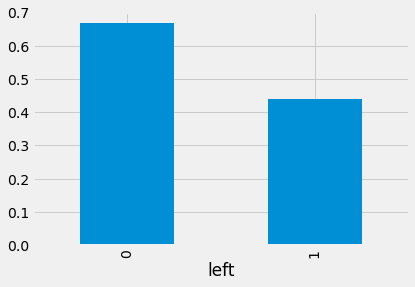

In [14]:
data.groupby(['left'])['satisfaction_level'].mean().plot.bar()
plt.show()

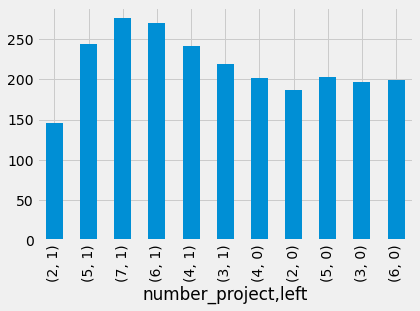

In [15]:
data.groupby(['number_project','left'],sort=False)['average_montly_hours'].mean().plot.bar()
plt.show()

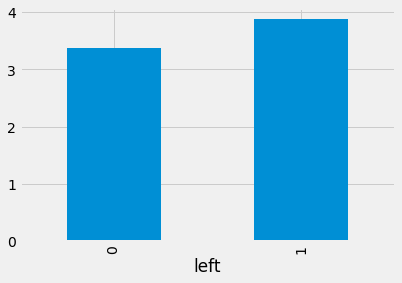

In [16]:
data.groupby(['left'])['time_spend_company'].mean().plot.bar()
plt.show()

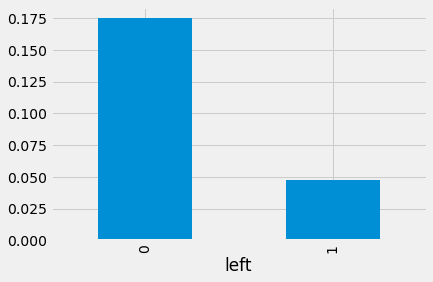

In [17]:
data.groupby(['left'])['Work_accident'].mean().plot.bar()
plt.show()

In [18]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [19]:
#categorical feature
categorical_feature=[feature for feature in data.columns if data[feature].dtype=='O']
categorical_feature

['sales', 'salary']

In [20]:
#numerical feature
numerical_feature=[feature for feature in data.columns if feature not in categorical_feature]
numerical_feature

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

### outliers

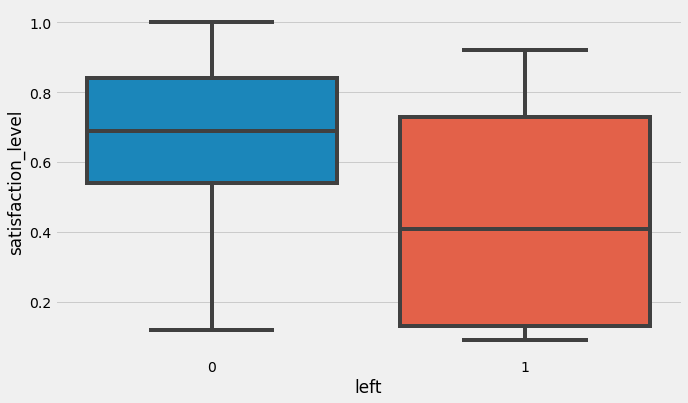

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='left',y='satisfaction_level',data=data)
plt.show()

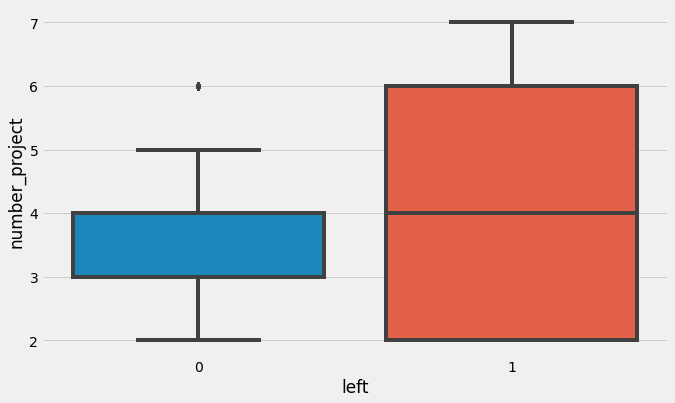

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='left',y='number_project',data=data)
plt.show()

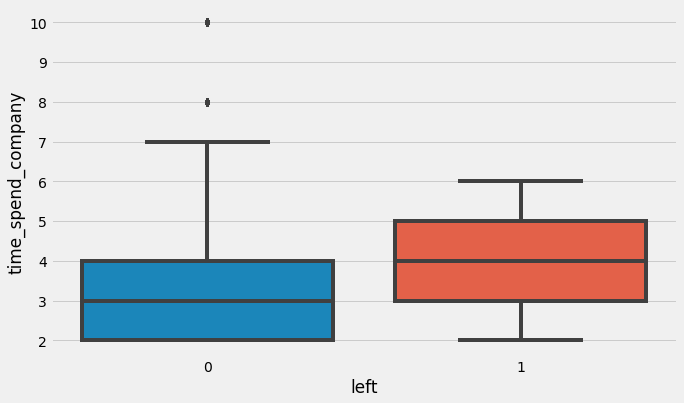

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='left',y='time_spend_company',data=data)
plt.show()

<AxesSubplot:>

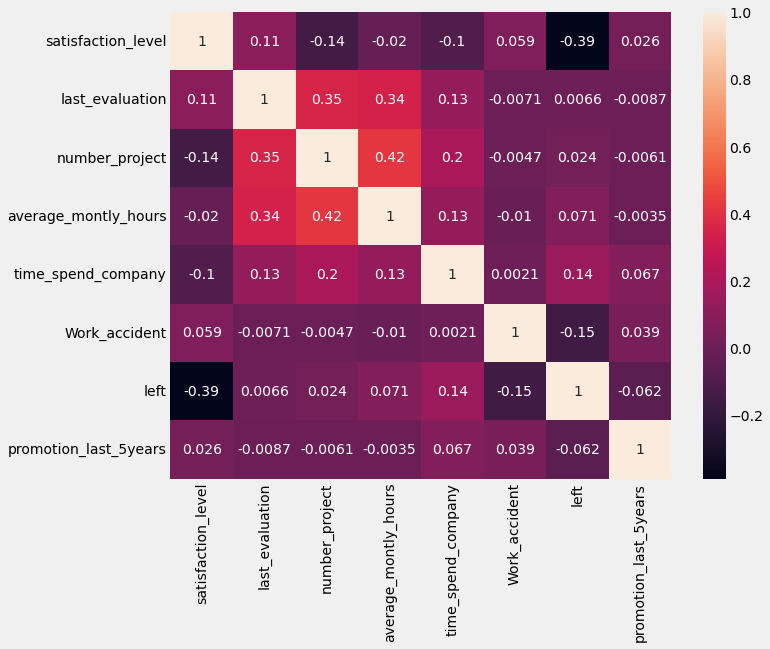

In [24]:
#checking correlation 
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [25]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [26]:
sales1=pd.get_dummies(data.sales,drop_first=True)

In [27]:
sales1

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [28]:
col=data[['sales']]

In [29]:
col

,sales
0,sales
1,sales
2,sales
3,sales
4,sales
...,...
14994,support
14995,support
14996,support
14997,support


In [30]:
col=pd.get_dummies((col))

In [31]:
data1=pd.concat([data,col],axis='columns')

In [32]:
data1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0


In [33]:
int_sal=pd.get_dummies(data['salary'],drop_first=True)
int_sal
data1=pd.concat([data,int_sal],axis='columns')

In [34]:
data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,0


In [35]:
data1.drop(['sales','salary'],axis=1,inplace=True)

In [36]:
X=data1.drop(['left'],axis=1)
y=data1['left']

### feature Selection

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeature=SelectKBest(score_func=chi2,k='all')
fit=bestfeature.fit(X,y)
datascores=pd.DataFrame(fit.scores_)
datacolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([datacolumns,datascores],axis=1)
featureScores.columns=['feature','score']

In [81]:
featureScores.sort_values(by='score',ascending=False)

,feature,score
3,average_montly_hours,945.588933
5,Work_accident,306.737710
0,satisfaction_level,228.193183
4,time_spend_company,191.708547
7,low,139.446529
6,promotion_last_5years,56.044865
8,medium,40.523922
2,number_project,3.390205
1,last_evaluation,0.026464


### feature importance

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.2555755  0.14534696 0.24493925 0.14471487 0.17269878 0.01640678
 0.00247387 0.01258433 0.00525968]


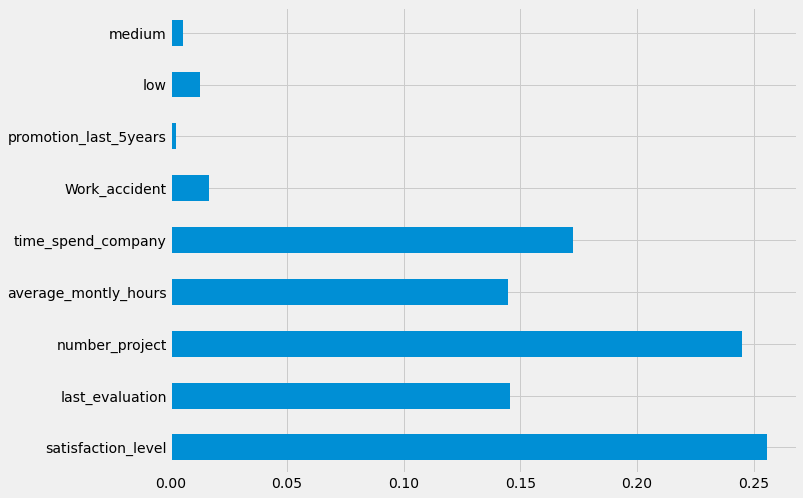

In [83]:
plt.figure(figsize=(10,8))
feature_imp=pd.Series(model.feature_importances_,X.columns)
feature_imp.plot(kind='barh')
plt.show()

### Missing values

In [84]:
X.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
low                      0
medium                   0
dtype: int64

### Handling imbalanced data

In [85]:
((y.value_counts())/len(data1))*100

0    76.191746
1    23.808254
Name: left, dtype: float64

In [86]:
# importing SMOTE 
from imblearn.over_sampling import SMOTE as sm
smote=sm(sampling_strategy='minority')
X_sample_train,y_sample_train=smote.fit_resample(X,y)

### train and test split

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sample_train,y_sample_train,test_size=0.20,random_state=42)

### model building

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBRFRegressor

models = [LogisticRegression(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         SVC(),
         XGBRFRegressor()]

In [89]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(model, X, y, cv=5, scoring='r2',error_score='raise')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [90]:
for model in models:
    train(model)

Model: LogisticRegression()
CV score: 0.2540786282343025
Model: DecisionTreeRegressor()
CV score: 0.36310000000000003
Model: RandomForestRegressor()
CV score: 0.3681576740479489
Model: SVC()
CV score: 0.19266135570539406
Model: XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=None, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               predictor=None, random_state=None, reg_alpha=None,
               sampling_method=None, scale_pos_weight=None, ...)
CV sc

In [91]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [92]:
y_pred=model.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score(y_test,y_pred)

0.9698162729658792